In [6]:
#PySpark_analysis_notebook
#This notebook follows the requested steps:

#STEP 1: Load Libraries & Data
#STEP 2: Data Cleaning
#STEP 3: Analytics
#STEP 4: Convert to Pandas for Visualization (Improved)
#STEP 5: Recommendations (Simple Rules)

# STEP 1: Load Libraries & Data

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, trim, when, isnan, count, length
spark = SparkSession.builder.appName("PySparkAnalysis").getOrCreate()
df = spark.read.options(header=True, inferSchema=True, multiLine=True, escape='"').csv("9ef84268-d588-465a-a308-a864a43d0070.csv")
print("Loaded DataFrame (Spark) with %d rows and %d columns" % (df.count(), len(df.columns)))
display(df.limit(5))

Loaded DataFrame (Spark) with 16039 rows and 10 columns


DataFrame[State: string, District: string, Market: string, Commodity: string, Variety: string, Grade: string, Arrival_Date: string, Min_x0020_Price: double, Max_x0020_Price: double, Modal_x0020_Price: double]

# STEP 2: Data Cleaning

In [10]:

# Generic cleaning steps:
#  - Trim whitespace on string columns
#  - Drop exact duplicate rows
#  - Report missing values

from pyspark.sql.functions import col, trim, when, isnan, count, length

# Trim all string columns
string_cols = [f.name for f in df.schema.fields if str(f.dataType) == 'StringType']
for sc in string_cols:
    df = df.withColumn(sc, trim(col(sc)))

# Drop exact duplicates
df = df.dropDuplicates()

# Count missing or null entries per column
missing_counts = df.select([
    count(
        when(col(c).isNull() | (trim(col(c).cast("string")) == ""), c)
    ).alias(c)
    for c in df.columns
])

print("Missing / empty counts:")
display(missing_counts.toPandas())

print("Schema after cleaning:")
df.printSchema()

# Optional: show a few cleaned records
display(df.limit(5))


Missing / empty counts:


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,0,0,0,0,0,0,0,0,0


Schema after cleaning:
root
 |-- State: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Market: string (nullable = true)
 |-- Commodity: string (nullable = true)
 |-- Variety: string (nullable = true)
 |-- Grade: string (nullable = true)
 |-- Arrival_Date: string (nullable = true)
 |-- Min_x0020_Price: double (nullable = true)
 |-- Max_x0020_Price: double (nullable = true)
 |-- Modal_x0020_Price: double (nullable = true)



DataFrame[State: string, District: string, Market: string, Commodity: string, Variety: string, Grade: string, Arrival_Date: string, Min_x0020_Price: double, Max_x0020_Price: double, Modal_x0020_Price: double]

# STEP 3: Analytics

In [12]:
# Provide useful analytics: summary statistics, top categories, and basic insights.

from pyspark.sql.functions import col, desc, count, mean, min, max, avg

print("=== 1. Basic Summary Statistics for Numeric Columns ===")
display(df.describe().toPandas())

=== 1. Basic Summary Statistics for Numeric Columns ===


,summary,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,count,16039,16039,16039,16039,16039,16039,16039,16039,16039,16039
1,mean,None,None,None,None,1055.7692307692307,None,None,4060.7165346966767,4764.492939085978,4551.684079431385
2,stddev,None,None,None,None,62.86248728528254,None,None,4362.812497623207,4864.355785756518,4732.051697316183
3,min,Andhra Pradesh,Jhunjhunu,A lot,Ajwan,(Red Nanital),FAQ,06/10/2025,0.0,0.0,2.0
4,max,West Bengal,kapurthala,vadakarapathy,nigella seeds,pumpkin-Organic,Small,06/10/2025,85000.0,120000.0,102500.0


In [13]:
print("=== 2. Top 10 Values for Each String (Categorical) Column ===")
for c in df.columns:
    if dict(df.dtypes)[c] == "string":
        print(f"\nTop values for {c}:")
        display(
            df.groupBy(c)
              .count()
              .orderBy(desc("count"))
              .limit(10)
              .toPandas()
        )

=== 2. Top 10 Values for Each String (Categorical) Column ===

Top values for State:


,State,count
0,Tamil Nadu,6146
1,Uttar Pradesh,2666
2,Madhya Pradesh,1186
3,Kerala,1118
4,Maharashtra,930
5,Gujarat,843
6,Punjab,606
7,Haryana,480
8,Himachal Pradesh,457
9,Rajasthan,309



Top values for District:


,District,count
0,Salem,505
1,Coimbatore,384
2,Madurai,302
3,Thiruvannamalai,300
4,Virudhunagar,291
5,Theni,264
6,Vellore,262
7,Namakkal,251
8,Chengalpattu,243
9,Ernakulam,210



Top values for Market:


,Market,count
0,Tiruvannamalai(Uzhavar Sandhai ),64
1,Pune,62
2,Mumbai,61
3,Vellore,60
4,Hosur(Uzhavar Sandhai ),60
5,Chokkikulam(Uzhavar Sandhai ),59
6,Anna nagar(Uzhavar Sandhai ),58
7,Anaiyur(Uzhavar Sandhai ),58
8,Hasthampatti(Uzhavar Sandhai ),58
9,Thathakapatti(Uzhavar Sandhai ),57



Top values for Commodity:


,Commodity,count
0,Onion,594
1,Wheat,528
2,Tomato,500
3,Potato,484
4,Green Chilli,483
5,Bhindi(Ladies Finger),470
6,Brinjal,452
7,Bottle gourd,430
8,Pumpkin,385
9,Banana,351



Top values for Variety:


,Variety,count
0,Other,3412
1,Green Chilly,394
2,Bottle Gourd,362
3,Bhindi,350
4,Pumpkin,286
5,Green Ginger,265
6,Lemon,248
7,Cabbage,244
8,Banana - Green,243
9,Raddish,235



Top values for Grade:


,Grade,count
0,FAQ,7085
1,Local,7048
2,Non-FAQ,838
3,Medium,812
4,Large,192
5,Ref grade-1,36
6,Small,28



Top values for Arrival_Date:


,Arrival_Date,count
0,06/10/2025,16039


In [14]:
print("=== 3. Count of Nulls/Empty per Column ===")
from pyspark.sql.functions import when, isnan, length
missing_counts = df.select([
    count(when(col(c).isNull() | (length(col(c)) == 0), c)).alias(c)
    for c in df.columns
])
display(missing_counts.toPandas())

=== 3. Count of Nulls/Empty per Column ===


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,0,0,0,0,0,0,0,0,0


In [15]:
print("=== 4. Correlation Between Numeric Columns (if any) ===")
numeric_cols = [f.name for f in df.schema.fields if "DoubleType" in str(f.dataType) or "LongType" in str(f.dataType) or "IntegerType" in str(f.dataType)]
if len(numeric_cols) > 1:
    for i in range(len(numeric_cols)):
        for j in range(i + 1, len(numeric_cols)):
            corr_val = df.stat.corr(numeric_cols[i], numeric_cols[j])
            print(f"Correlation between {numeric_cols[i]} and {numeric_cols[j]}: {corr_val:.3f}")
else:
    print("Not enough numeric columns to compute correlations.")

=== 4. Correlation Between Numeric Columns (if any) ===
Correlation between Min_x0020_Price and Max_x0020_Price: 0.958
Correlation between Min_x0020_Price and Modal_x0020_Price: 0.981
Correlation between Max_x0020_Price and Modal_x0020_Price: 0.981


In [16]:
print("=== 5. Overall Row and Column Counts ===")
row_count = df.count()
col_count = len(df.columns)
print(f"Total Rows: {row_count}, Total Columns: {col_count}")

=== 5. Overall Row and Column Counts ===
Total Rows: 16039, Total Columns: 10


In [17]:
print("=== 6. Top 5 Numeric Columns by Average Value ===")
if numeric_cols:
    numeric_summary = (
        df.select([avg(col(c)).alias(c) for c in numeric_cols])
          .toPandas()
          .T
          .reset_index()
          .rename(columns={"index": "Column", 0: "Average_Value"})
          .sort_values("Average_Value", ascending=False)
          .head(5)
    )
    display(numeric_summary)
else:
    print("No numeric columns found to compute averages.")

=== 6. Top 5 Numeric Columns by Average Value ===


,Column,Average_Value
1,Max_x0020_Price,4764.492939
2,Modal_x0020_Price,4551.684079
0,Min_x0020_Price,4060.716535


# STEP 4: Convert to Pandas for Visualization (Safe and Efficient)

Dataset has 16039 rows — sampling ~5000 rows (0.3117 fraction) for visualization.
Pandas preview for visualization:


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Kerala,Malappuram,Kottakkal,Capsicum,Other,FAQ,06/10/2025,4800.0,5000.0,4900.0
1,Maharashtra,Sangli,Sangli,Chili Red,Other,Local,06/10/2025,8500.0,14500.0,11500.0
2,Madhya Pradesh,Sehore,Ashta,Kabuli Chana(Chickpeas-White),Dollar Gram,FAQ,06/10/2025,5901.0,8881.0,8881.0
3,Tamil Nadu,Dharmapuri,Pennagaram(Uzhavar Sandhai ),Cauliflower,Ranchi,Local,06/10/2025,2300.0,2500.0,2500.0
4,Kerala,Kozhikode(Calicut),Quilandy,Beetroot,Other,FAQ,06/10/2025,4800.0,5200.0,5000.0


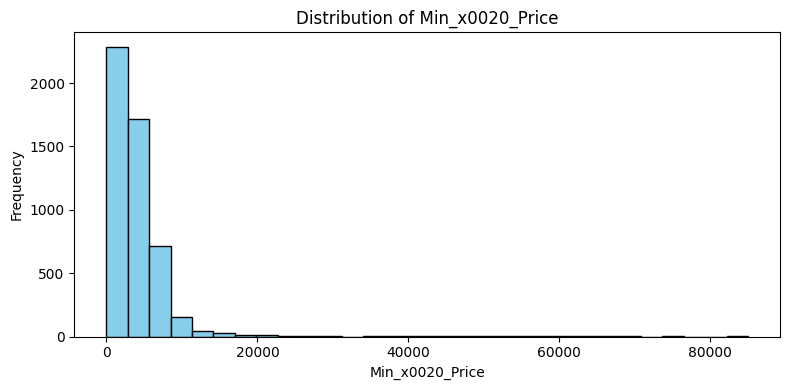

In [19]:
from pyspark.sql.functions import rand
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SAMPLE_SIZE = 5000  # smaller sample for stability (adjust as needed)

# Safer sampling: use Spark's .sample() instead of orderBy(rand())
total = df.count()
if total > SAMPLE_SIZE:
    fraction = float(SAMPLE_SIZE) / total
    print(f"Dataset has {total} rows — sampling ~{SAMPLE_SIZE} rows ({fraction:.4f} fraction) for visualization.")
    pdf_vis = df.sample(withReplacement=False, fraction=fraction, seed=42).limit(SAMPLE_SIZE).toPandas()
else:
    pdf_vis = df.limit(SAMPLE_SIZE).toPandas()

print("Pandas preview for visualization:")
display(pdf_vis.head())

# --- Visualization Section ---

numeric_cols = pdf_vis.select_dtypes(include=[np.number]).columns.tolist()
obj_cols = pdf_vis.select_dtypes(include=['object']).columns.tolist()

# 1️⃣ Histogram – Distribution of first numeric column
if numeric_cols:
    col = numeric_cols[0]
    plt.figure(figsize=(8, 4))
    plt.hist(pdf_vis[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


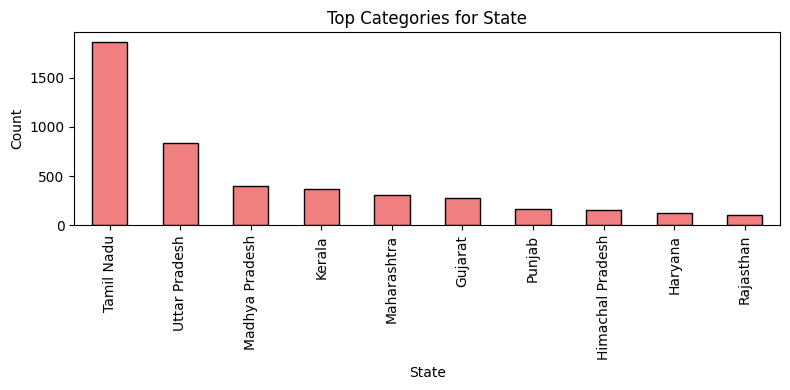

In [20]:
# 2️⃣ Bar Chart – Top 10 categories for first object column
if obj_cols:
    col = obj_cols[0]
    top = pdf_vis[col].value_counts(dropna=False).head(10)
    plt.figure(figsize=(8, 4))
    top.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f"Top Categories for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

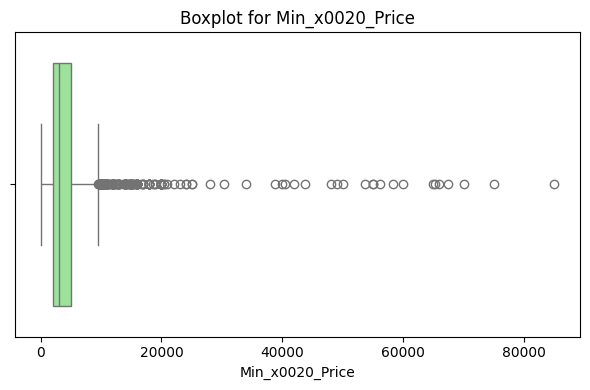

In [21]:
# 3️⃣ Boxplot – Detect outliers in first numeric column
if len(numeric_cols) > 0:
    col = numeric_cols[0]
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=pdf_vis[col], color='lightgreen')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

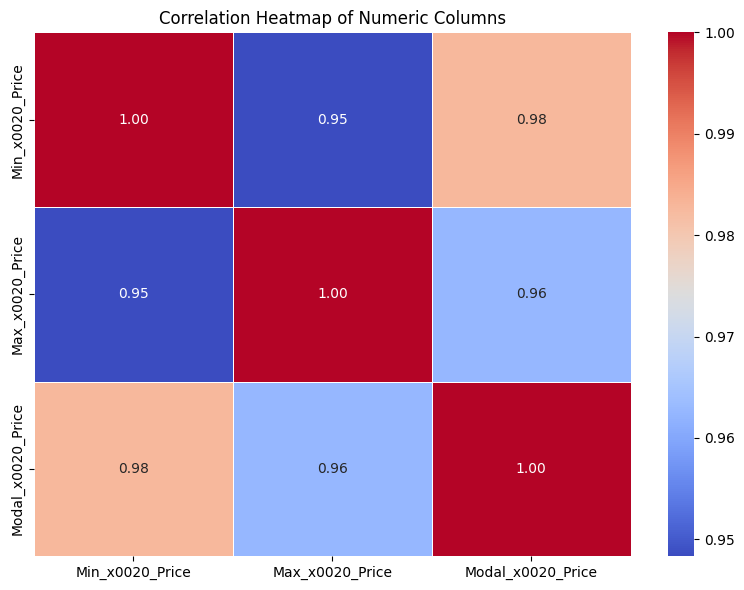

In [22]:
# 4️⃣ Correlation Heatmap – Relationship between numeric columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    corr = pdf_vis[numeric_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Numeric Columns")
    plt.tight_layout()
    plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_31996\1017213276.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")


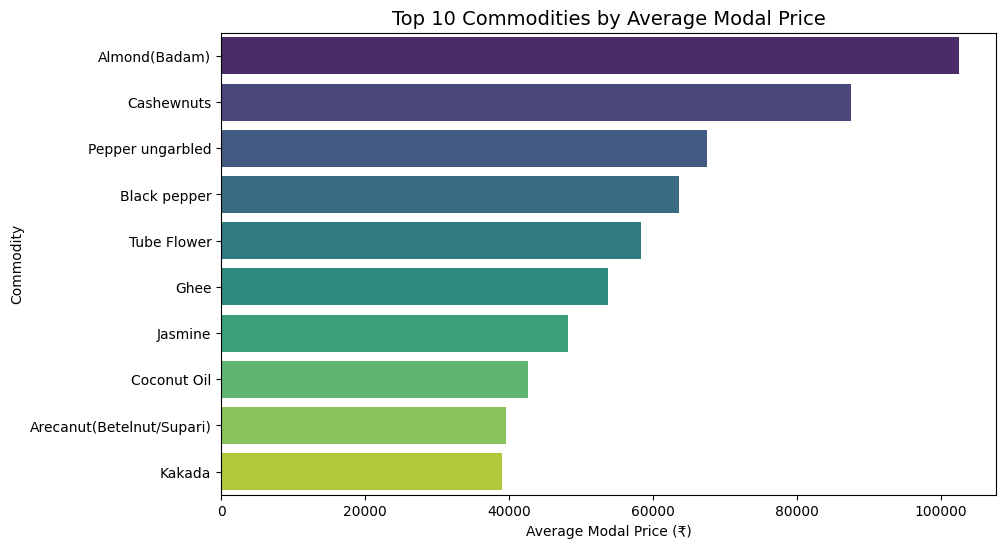

In [24]:
# Convert Spark DataFrame to Pandas for visualization
df_pandas = df.toPandas()

# Clean column names
df_pandas.columns = df_pandas.columns.str.replace("_x0020_", "_")

# Now use df_pandas in plots
top_commodities = (
    df_pandas.groupby('Commodity')['Modal_Price']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_commodities.values, y=top_commodities.index, palette="viridis")
plt.title("Top 10 Commodities by Average Modal Price", fontsize=14)
plt.xlabel("Average Modal Price (₹)")
plt.ylabel("Commodity")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_31996\3089687186.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states["Average_Modal_Price"], y=top_states["State"], palette="coolwarm")


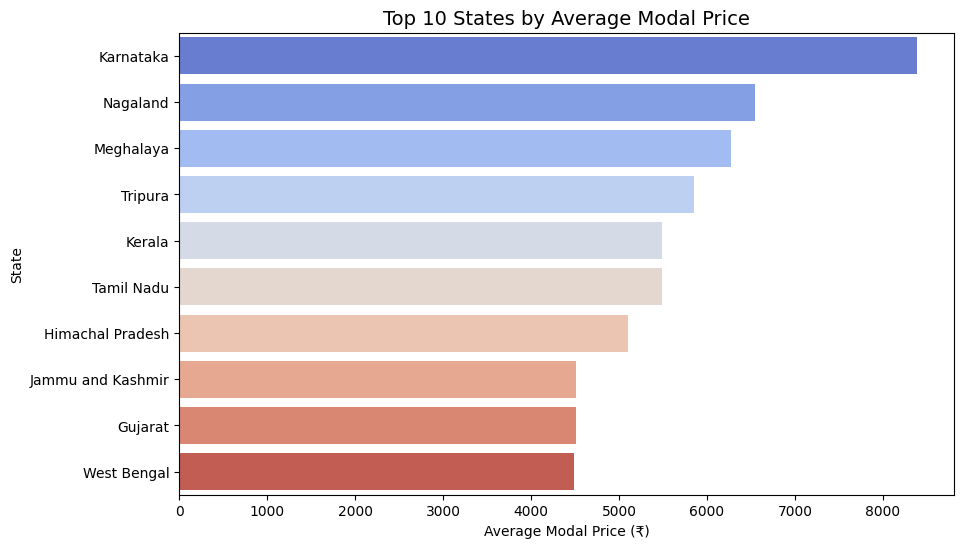

In [25]:
from pyspark.sql import functions as F

# Group and calculate mean modal price
top_states_spark = (
    df.groupBy("State")
    .agg(F.mean("Modal_x0020_Price").alias("Average_Modal_Price"))
    .orderBy(F.desc("Average_Modal_Price"))
    .limit(10)
)

# Convert to Pandas for plotting
top_states = top_states_spark.toPandas()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_states["Average_Modal_Price"], y=top_states["State"], palette="coolwarm")
plt.title("Top 10 States by Average Modal Price", fontsize=14)
plt.xlabel("Average Modal Price (₹)")
plt.ylabel("State")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_31996\246335135.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Average_Modal_Price", y="Market", data=top_markets, palette="magma")


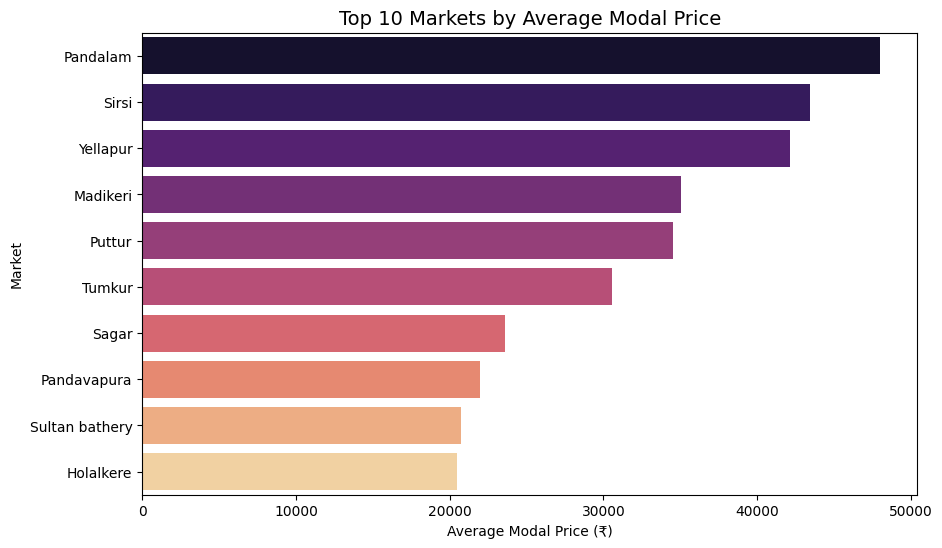

In [26]:
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Markets by Average Modal Price
top_markets = (
    df.groupBy("Market")
      .agg(F.mean("Modal_x0020_Price").alias("Average_Modal_Price"))
      .orderBy(F.desc("Average_Modal_Price"))
      .limit(10)
      .toPandas()     # Convert to pandas for plotting
)

plt.figure(figsize=(10,6))
sns.barplot(x="Average_Modal_Price", y="Market", data=top_markets, palette="magma")
plt.title("Top 10 Markets by Average Modal Price", fontsize=14)
plt.xlabel("Average Modal Price (₹)")
plt.ylabel("Market")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_31996\418262315.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Average_Modal_Price", y="Market", data=top_markets, palette="magma")


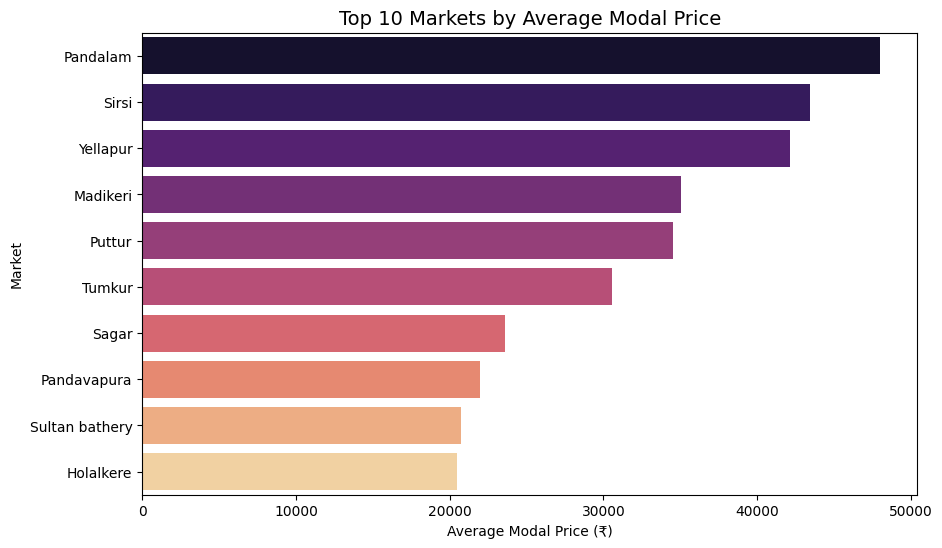

In [27]:
# 3️⃣ Top 10 Markets by Average Modal Price
top_markets = (
    df.groupBy("Market")
      .agg(F.mean("Modal_x0020_Price").alias("Average_Modal_Price"))
      .orderBy(F.desc("Average_Modal_Price"))
      .limit(10)
      .toPandas()     # Convert to pandas for plotting
)

plt.figure(figsize=(10,6))
sns.barplot(x="Average_Modal_Price", y="Market", data=top_markets, palette="magma")
plt.title("Top 10 Markets by Average Modal Price", fontsize=14)
plt.xlabel("Average Modal Price (₹)")
plt.ylabel("Market")
plt.show()

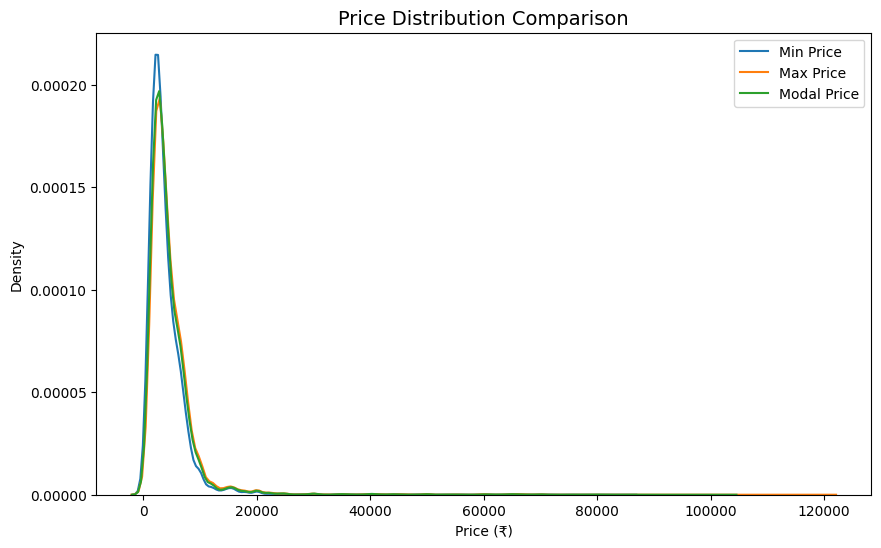

In [28]:
# Step 3️⃣: 4️⃣ Price Distribution Comparison (Min, Max, Modal)
price_df = df.select("Min_x0020_Price", "Max_x0020_Price", "Modal_x0020_Price").toPandas()

plt.figure(figsize=(10,6))
sns.kdeplot(price_df["Min_x0020_Price"], label="Min Price")
sns.kdeplot(price_df["Max_x0020_Price"], label="Max Price")
sns.kdeplot(price_df["Modal_x0020_Price"], label="Modal Price")
plt.title("Price Distribution Comparison", fontsize=14)
plt.xlabel("Price (₹)")
plt.legend()
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_31996\2398344756.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=box_df, x="Commodity", y="Modal_x0020_Price", palette="Set2")


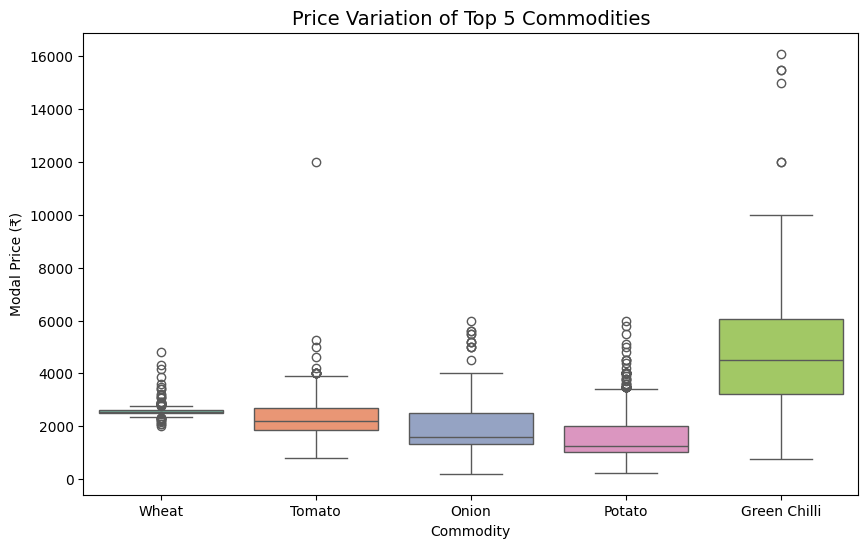

In [29]:
# Step 4️⃣: 5️⃣ Boxplot of Top 5 Most Frequent Commodities
top5_commodities = (
    df.groupBy("Commodity")
      .count()
      .orderBy(F.desc("count"))
      .limit(5)
      .toPandas()["Commodity"]
      .tolist()
)

box_df = (
    df.filter(F.col("Commodity").isin(top5_commodities))
      .select("Commodity", "Modal_x0020_Price")
      .toPandas()
)

plt.figure(figsize=(10,6))
sns.boxplot(data=box_df, x="Commodity", y="Modal_x0020_Price", palette="Set2")
plt.title("Price Variation of Top 5 Commodities", fontsize=14)
plt.xlabel("Commodity")
plt.ylabel("Modal Price (₹)")
plt.show()

STEP5 : Recommendations

In [30]:
#STEP5 : Recommendations
# Create simple rule-based recommendations based on common patterns.

from pyspark.sql.functions import col, count, isnan, length, desc, stddev, mean

# Thresholds
MISSING_THRESHOLD = 0.3
DOMINANCE_THRESHOLD = 0.9
SMALL_DATASET_THRESHOLD = 100
HIGH_CARDINALITY_THRESHOLD = 0.5   # 50% unique values
LOW_VARIANCE_THRESHOLD = 0.01      # numeric variance fraction
OUTLIER_STD_MULTIPLIER = 3

recommendations = []
total = df.count()

# 1. Missing values
for c, dtype in df.dtypes:
    if dtype in ('int', 'double', 'float', 'long', 'decimal'):
        missing_count = df.select(count(when(col(c).isNull() | isnan(col(c)), c))).collect()[0][0]
    else:
        missing_count = df.select(count(when(col(c).isNull() | (length(col(c)) == 0), c))).collect()[0][0]

    missing_frac = missing_count / total
    if missing_frac > MISSING_THRESHOLD:
        recommendations.append(f"Column '{c}' has {missing_frac:.1%} missing — consider imputing or improving data collection.")

# 2. Small dataset
if total < SMALL_DATASET_THRESHOLD:
    recommendations.append(f"Dataset only has {total} rows — consider collecting more data.")

# 3. Categorical dominance & high cardinality
for c, dtype in df.dtypes:
    if dtype == 'string':
        # dominance
        top_count = df.groupBy(c).count().orderBy(desc('count')).limit(1).collect()[0]['count']
        top_frac = top_count / total
        if top_frac > DOMINANCE_THRESHOLD:
            recommendations.append(f"Categorical column '{c}' is highly imbalanced (top category {top_frac:.1%}). Consider rebalancing.")
        # high cardinality
        unique_count = df.select(c).distinct().count()
        if unique_count / total > HIGH_CARDINALITY_THRESHOLD:
            recommendations.append(f"Categorical column '{c}' has high cardinality ({unique_count} unique values). Consider grouping or encoding strategies.")

# 4. Numeric low variance & outliers
for c, dtype in df.dtypes:
    if dtype in ('int', 'double', 'float', 'long', 'decimal'):
        stats = df.select(mean(col(c)).alias('mean'), stddev(col(c)).alias('std')).collect()[0]
        if stats['std'] is not None and stats['std'] == 0:
            recommendations.append(f"Numeric column '{c}' has zero variance — may not be informative.")
        # simple outlier check using mean ± 3*std
        if stats['std'] is not None and stats['std'] > 0:
            outlier_count = df.filter((col(c) < stats['mean'] - OUTLIER_STD_MULTIPLIER*stats['std']) | 
                                      (col(c) > stats['mean'] + OUTLIER_STD_MULTIPLIER*stats['std'])).count()
            if outlier_count / total > 0.01:
                recommendations.append(f"Numeric column '{c}' has {outlier_count} outliers (>3 std dev). Consider handling them.")

# 5. Duplicate rows
duplicate_count = df.count() - df.dropDuplicates().count()
if duplicate_count > 0:
    recommendations.append(f"Dataset has {duplicate_count} duplicate rows. Consider removing duplicates.")

# Print recommendations
if recommendations:
    print("Recommendations:")
    for r in recommendations:
        print("- ", r)
else:
    print("No automatic recommendations triggered.")

Recommendations:
-  Categorical column 'Arrival_Date' is highly imbalanced (top category 100.0%). Consider rebalancing.
-  Numeric column 'Min_x0020_Price' has 196 outliers (>3 std dev). Consider handling them.
-  Numeric column 'Max_x0020_Price' has 223 outliers (>3 std dev). Consider handling them.
-  Numeric column 'Modal_x0020_Price' has 208 outliers (>3 std dev). Consider handling them.


C:\Users\adity\AppData\Local\Temp\ipykernel_31996\4159128380.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_percentages.values, y=state_percentages.index, palette="crest")


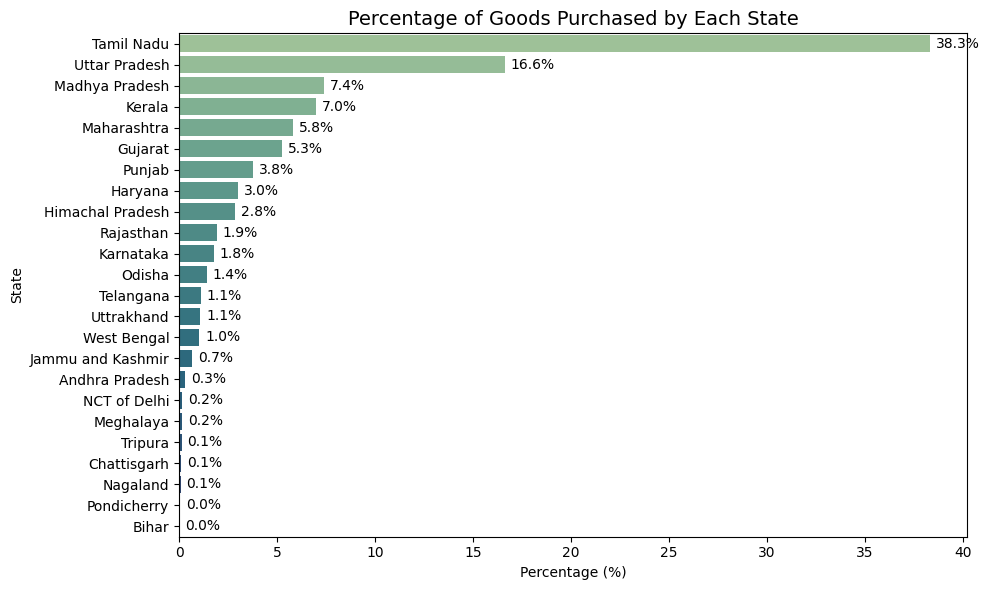

In [57]:
#Percentage of goods by State
# -----------------------------
state_counts = df_pandas['State'].value_counts()
state_percentages = (state_counts / state_counts.sum()) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=state_percentages.values, y=state_percentages.index, palette="crest")
plt.title("Percentage of Goods Purchased by Each State", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("State")

# Add percentage labels
for index, value in enumerate(state_percentages.values):
    plt.text(value + 0.3, index, f"{value:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_31996\2140315657.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

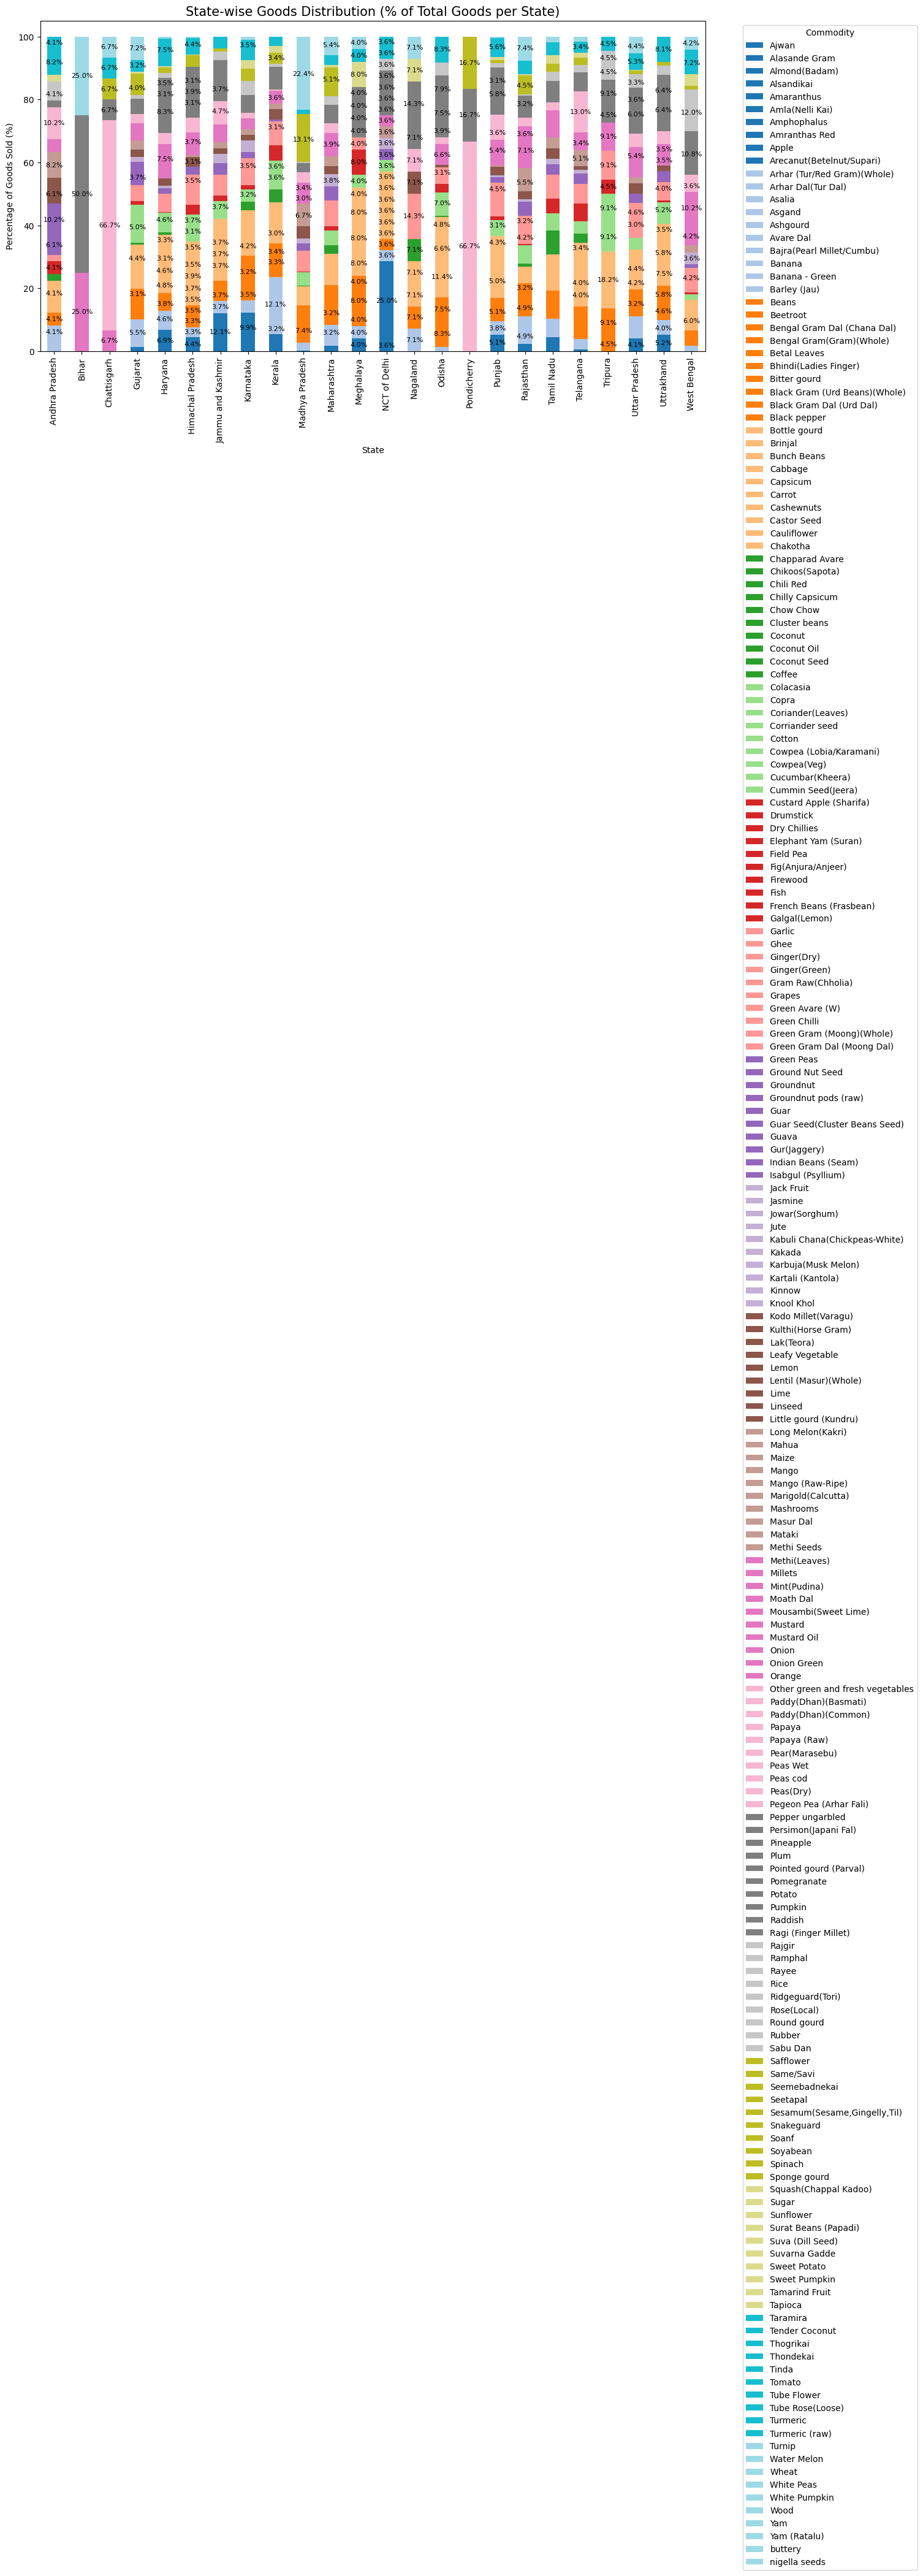

In [71]:
# Compute percentage of goods (commodities) sold per state
# -----------------------------------------------
state_commodity_counts = df_pandas.groupby(['State', 'Commodity']).size().reset_index(name='Count')

# Calculate % of goods per state
state_totals = state_commodity_counts.groupby('State')['Count'].transform('sum')
state_commodity_counts['Percentage'] = (state_commodity_counts['Count'] / state_totals) * 100

# Pivot for stacked bar chart
pivot_df = state_commodity_counts.pivot(index='State', columns='Commodity', values='Percentage').fillna(0)

# -----------------------------------------------
# Plot stacked bar chart with percentages
# -----------------------------------------------
plt.figure(figsize=(14,7))
pivot_df.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14,7))

plt.title("State-wise Goods Distribution (% of Total Goods per State)", fontsize=15)
plt.xlabel("State")
plt.ylabel("Percentage of Goods Sold (%)")
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels on each stacked segment (optional but heavy for many commodities)
for i, state in enumerate(pivot_df.index):
    cumulative = 0
    for commodity in pivot_df.columns:
        val = pivot_df.loc[state, commodity]
        if val > 3:  # Show labels only for segments >3% for clarity
            plt.text(i, cumulative + val/2, f"{val:.1f}%", ha='center', va='center', fontsize=8, color='black')
        cumulative += val

plt.show()

C:\Users\adity\pyspark_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\adity\pyspark_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


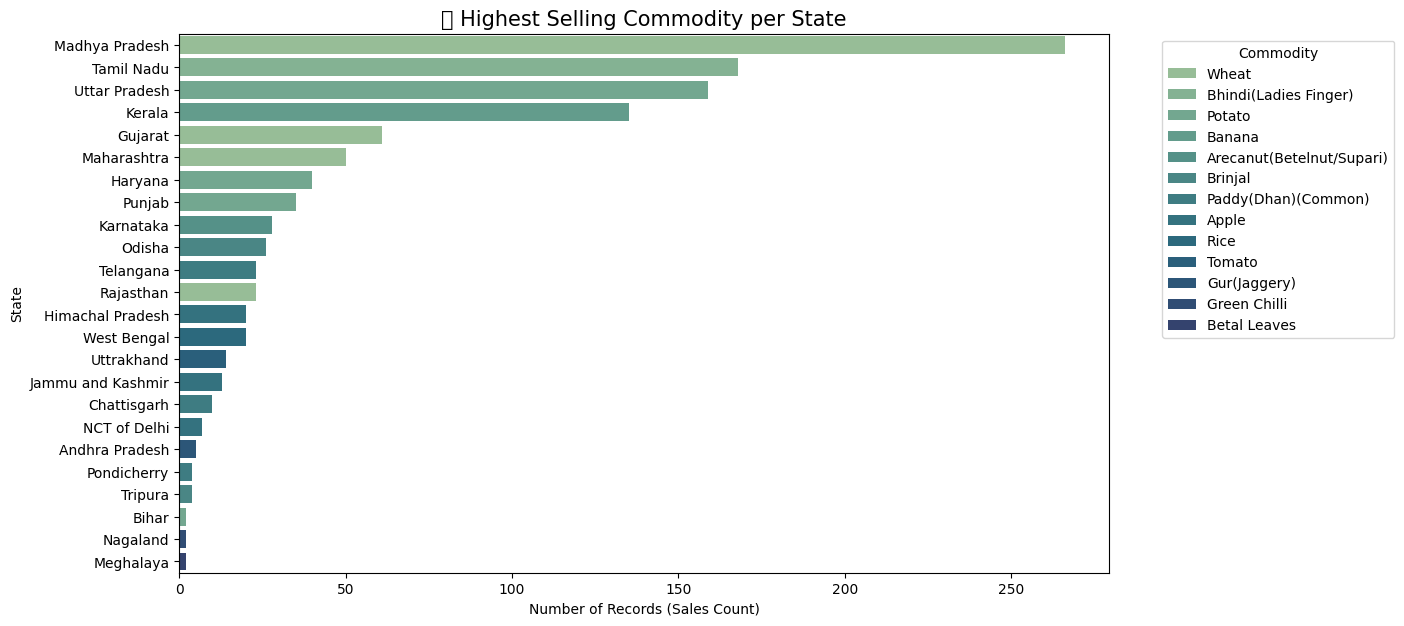

In [85]:
# Graph — Highest Selling Product per State
plt.figure(figsize=(12,7))
sns.barplot(x='Count', y='State', hue='Commodity', data=highest_selling, dodge=False, palette='crest')
plt.title("🌟 Highest Selling Commodity per State", fontsize=15)
plt.xlabel("Number of Records (Sales Count)")
plt.ylabel("State")
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc='upper left')


C:\Users\adity\pyspark_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\adity\pyspark_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


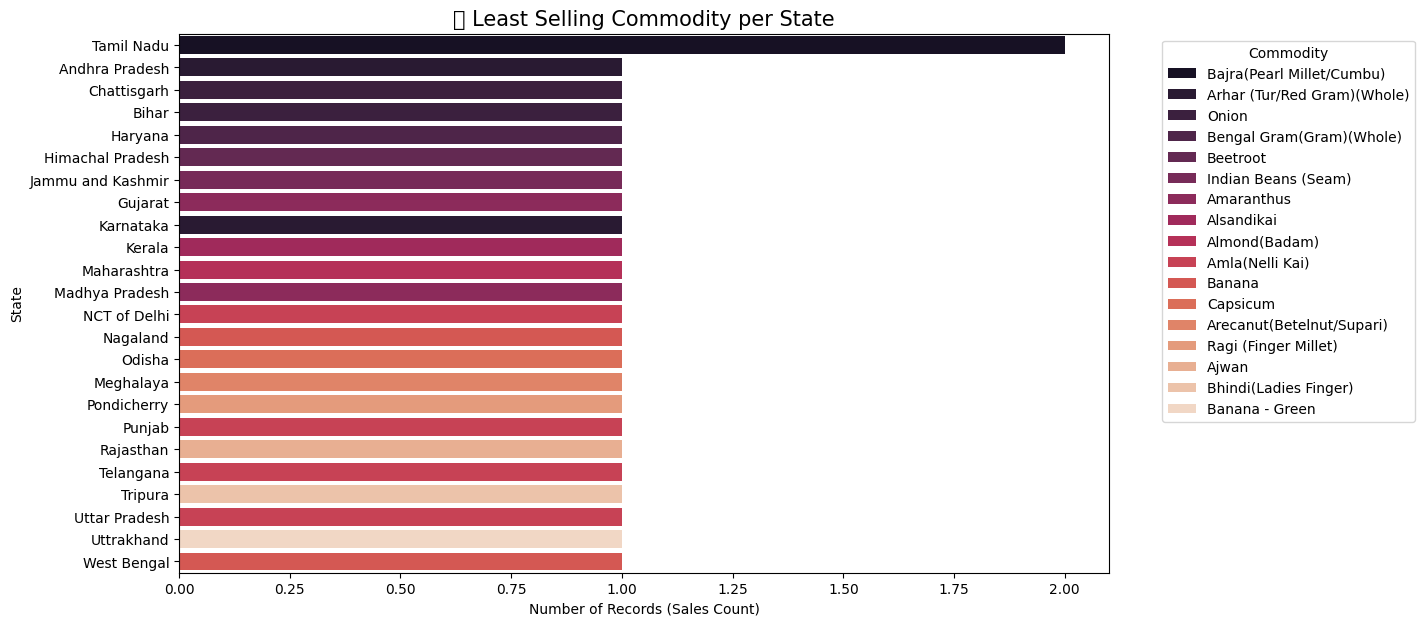

In [87]:
# Graph — Least Selling Product per State
plt.figure(figsize=(12,7))
sns.barplot(x='Count', y='State', hue='Commodity', data=least_selling, dodge=False, palette='rocket')
plt.title("🚨 Least Selling Commodity per State", fontsize=15)
plt.xlabel("Number of Records (Sales Count)")
plt.ylabel("State")
plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1), loc='upper left')